In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div> 

In [2]:
#use to fix to words like isn't to is not
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.1 MB/s eta 0:00:00


In [3]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.10.0
    Uninstalling h5py-3.10.0:
      Successfully uninstalled h5py-3.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1

In [5]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

2024-11-11 23:57:14.928632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731369434.958212      25 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731369434.967263      25 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Loading Dataset </div> 

In [6]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [7]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Data Wrangling  </div> 

#### 1. Computing Dimension of Dataset

In [8]:
print('dataset shape: ',df.shape)

dataset shape:  (50000, 2)


#### 2. Statistical Summary of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### 3. Checking if There's Any Duplicate Records.

In [10]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  418


In [11]:
df.drop_duplicates(inplace = True)

#### 4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [12]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
review,0,0.0
sentiment,0,0.0


#### 5. Performing Descriptive Analysis

In [13]:
round(df.describe(include="O").T,2)

,count,unique,top,freq
review,49582,49582,No one expects the Star Trek movies to be high...,1
sentiment,49582,2,positive,24884


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis EDA  </div> 

#### 1. Visualizing the Distribution of each sentiment class

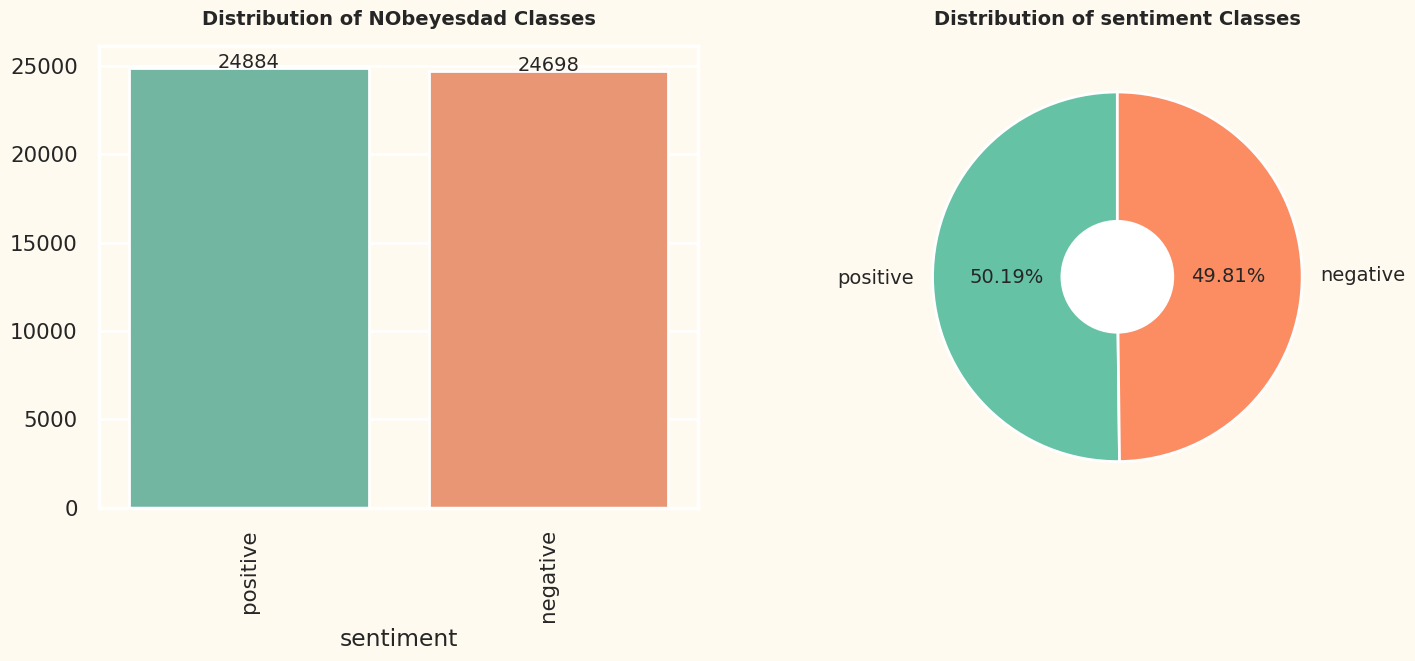

In [14]:
classes = ['positive','negative']

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sentiment_counts = df["sentiment"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2', order=classes)
plt.title("Distribution of NObeyesdad Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(classes))
plt.pie(sentiment_counts, labels=classes, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of sentiment Classes", fontweight="black", size=14, pad=15)
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Preprocessing  </div> 

#### 1. Lowercasing 

In [15]:
df['review'] = df['review'].str.lower()

In [16]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

#### 2. Removing Html tags

In [17]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [18]:
df['review'] = df['review'].apply(remove_html_tags)

#### 3. Removing URLs

In [19]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

df['review'] = df['review'].apply(remove_url)

#### 4. Remove Punctuation

In [20]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [22]:
df['review'] = df['review'].apply(remove_punctuation)

#### 5. Chat word  treatment

In [23]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}


In [24]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [25]:
df['review'] = df['review'].apply(chat_conversion)

#### 7. Removing Stopword

In [26]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def stopwords_removal(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)            

In [28]:
df['review']=df['review'].apply(stopwords_removal)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production br br filming te...,positive
2,thought wonderful way spend Tears eyes ...,positive
3,basically theres family little boy jake thi...,negative
4,petter matteis love Tears eyes money vi...,positive


#### 8. Removing Emojis

In [29]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
df['review']=df['review'].apply(remove_emoji)

#### 9. Removing contractions

In [31]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['review'] = df['review'].apply(expand_contractions)


#### Lemmatize

In [32]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [33]:
# Function to perform lemmatization on a single text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Function to lemmatize the 'review' column of the DataFrame
def lemmatize_reviews(df):
    df['review'] = df['review'].apply(lemmatize_text)
    return df

In [34]:
# Lemmatize the 'review' column
df = lemmatize_reviews(df)

#### 10. Tokenize the text

In [35]:
def do_tokenization(text):
    
    token_words = word_tokenize(text)
    return token_words

df['review'] = df['review'].apply(do_tokenization)

In [36]:
df

,review,sentiment
0,"[one, reviewer, mention, watch, 1, oz, episode...",positive
1,"[wonderful, little, production, br, br, film, ...",positive
2,"[think, wonderful, way, spend, Tears, eye, hot...",positive
3,"[basically, there, be, family, little, boy, ja...",negative
4,"[petter, matteis, love, tear, eye, money, visu...",positive
...,...,...
49995,"[think, movie, right, good, job, be, not, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, act, idiotic, ...",negative
49997,"[catholic, teach, parochial, elementary, schoo...",negative
49998,"[I, be, go, disagree, previous, comment, side,...",negative


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div> 

In [37]:
x = df['review']
y = df['sentiment']

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
X_train.shape

(39665,)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Tokenize the data </div> 

In [41]:
tokenizer = Tokenizer()

In [42]:
tokenizer.fit_on_texts(X_train)

In [43]:
len(tokenizer.word_index)

142120

In [44]:
tokenizer.document_count

39665

In [45]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [46]:
for num in X_train[0]:
    print(num, end=' ')

12 2 2910 2522 68 51 9 44933 10250 3101 5885 2808 4903 462 12 17 176 10250 716 89 152 38 5632 718 44 635 105 181 26 16 257 204 246 9 2 2067 1016 15 1040 54 2545 36 5 19 1361 61 7 77 64 95 6 430 168 2 56 2047 18 3452 68 10 4 56 214 226 16 1234 34 31 77 7762 6 4 430 168 44934 

In [47]:
# Print corresponding words horizontally
for num in X_train[0]:
    word = tokenizer.index_word.get(num, 'UNK')  
    print(word, end=' ')

get movie library saw lot actor like itjohn cleese ian holm ralph richardson etc get watch expect cleese large role since first billing surprised find five minute screen tear eye along everyone else like movie amazingly pointless character nobody plot nonexistent end one bad ending ever see funny part that be stay away movie want prevent go huh lot do not want waste tears eye ignore people say funny movieit be not stay away costsplease 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Padding the data </div> 

In [48]:
max_length = 0
for sequence in X_train:
    # Calculate the length of the sequence
    sequence_length = len(sequence)
    # Update max_length if the current sequence length is greater
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 1466


In [49]:
X_train=pad_sequences(X_train,maxlen=100,padding="post")
X_test=pad_sequences(X_test,maxlen=100,padding="post")

In [50]:
X_train[0]

array([   12,     2,  2910,  2522,    68,    51,     9, 44933, 10250,
        3101,  5885,  2808,  4903,   462,    12,    17,   176, 10250,
         716,    89,   152,    38,  5632,   718,    44,   635,   105,
         181,    26,    16,   257,   204,   246,     9,     2,  2067,
        1016,    15,  1040,    54,  2545,    36,     5,    19,  1361,
          61,     7,    77,    64,    95,     6,   430,   168,     2,
          56,  2047,    18,  3452,    68,    10,     4,    56,   214,
         226,    16,  1234,    34,    31,    77,  7762,     6,     4,
         430,   168, 44934,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [51]:
y_train

array([0, 0, 1, ..., 0, 0, 1])


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Modelling </div> 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Bidirectional RNN</div> 

In [52]:
# Define the model
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
RNN_model.add(SpatialDropout1D(0.2))
RNN_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(SimpleRNN(16, return_sequences=False))

# Continue with other layers
RNN_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
RNN_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
RNN_model.summary()


W0000 00:00:1731371226.447894      25 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 253s 198ms/step - accuracy: 0.5071 - loss: 0.7957 - val_accuracy: 0.5029 - val_loss: 0.6956
Epoch 2/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 248s 200ms/step - accuracy: 0.5049 - loss: 0.6945 - val_accuracy: 0.5332 - val_loss: 0.6874
Epoch 3/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 248s 200ms/step - accuracy: 0.5811 - loss: 0.6665 - val_accuracy: 0.6170 - val_loss: 0.6627
Epoch 4/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 264s 202ms/step - accuracy: 0.6320 - loss: 0.6281 - val_accuracy: 0.5725 - val_loss: 0.6668
Epoch 5/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 250s 202ms/step - accuracy: 0.6496 - loss: 0.5851 - val_accuracy: 0.6830 - val_loss: 0.6293
Epoch 6/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 262s 202ms/step - accuracy: 0.6865 - loss: 0.5595 - val_accuracy: 0.6204 - val_loss: 0.6568
Epoch 7/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 263s 203ms/step - accuracy: 0.6805 - loss: 0.5462 - val_accuracy: 0.7248 - val_loss: 0.6197
Epoch 8/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 250s 202ms/step - ac

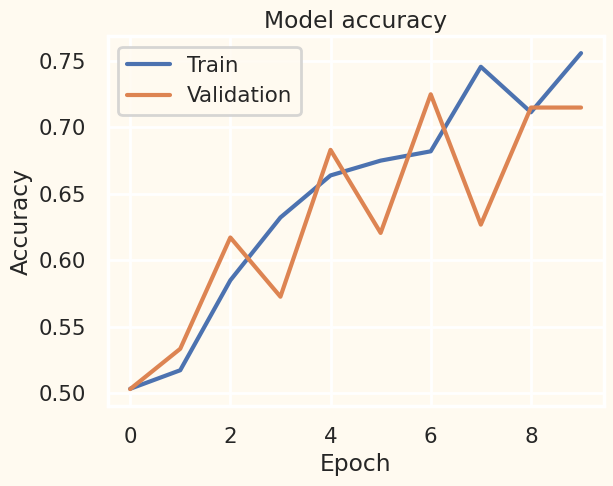

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

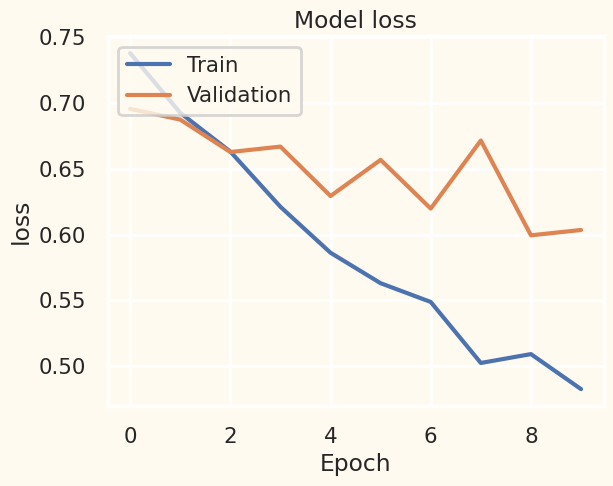

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> LSTM </div> 

In [56]:
# Define the model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(5, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())


lstm_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 49s 148ms/step - accuracy: 0.5340 - loss: 0.7420 - val_accuracy: 0.5977 - val_loss: 0.6695
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.6659 - loss: 0.5791 - val_accuracy: 0.8554 - val_loss: 0.3800
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.8311 - loss: 0.4224 - val_accuracy: 0.8570 - val_loss: 0.3820
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.8988 - loss: 0.3203 - val_accuracy: 0.8646 - val_loss: 0.3628
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.8993 - loss: 0.3105 - val_accuracy: 0.8649 - val_loss: 0.3728
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 0.8588 - loss: 0.3555 - val_accuracy: 0.8544 - val_loss: 0.4043
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.8974 - loss: 0.3080 - val_accuracy: 0.8548 - val_loss: 0.4019
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 149ms/step - accuracy: 0.8989 - loss: 0

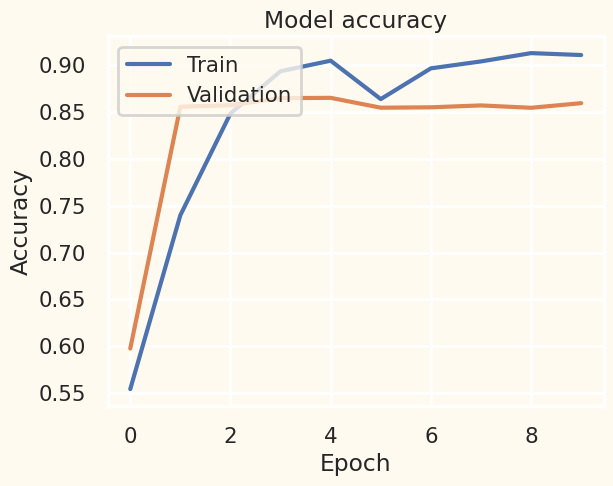

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

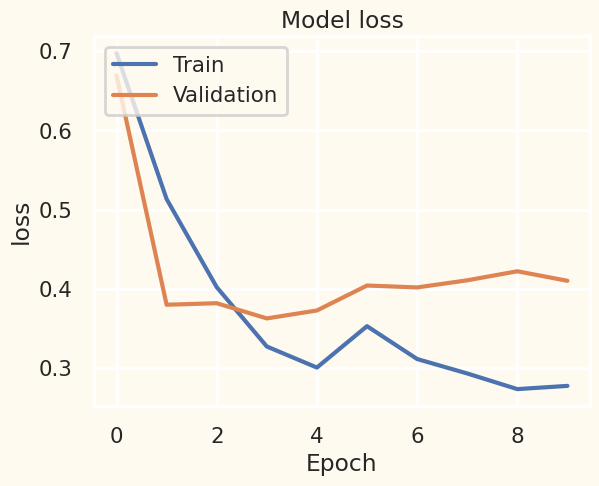

In [59]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> GRU</div> 

In [60]:
# Define the model
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
GRU_model.add(SpatialDropout1D(0.5))
GRU_model.add(GRU(5, return_sequences=False))
GRU_model.add(Dropout(0.5))
#GRU_model.add(BatchNormalization())


GRU_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
GRU_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = GRU_model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.5453 - loss: 0.6855 - val_accuracy: 0.6677 - val_loss: 0.6081
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.7761 - loss: 0.5202 - val_accuracy: 0.8554 - val_loss: 0.3827
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.8800 - loss: 0.3644 - val_accuracy: 0.8728 - val_loss: 0.3402
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.9108 - loss: 0.2952 - val_accuracy: 0.8756 - val_loss: 0.3216
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.9331 - loss: 0.2330 - val_accuracy: 0.8768 - val_loss: 0.3192


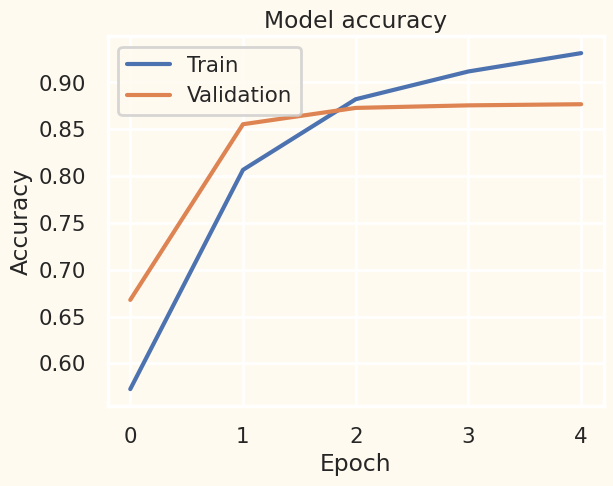

In [62]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

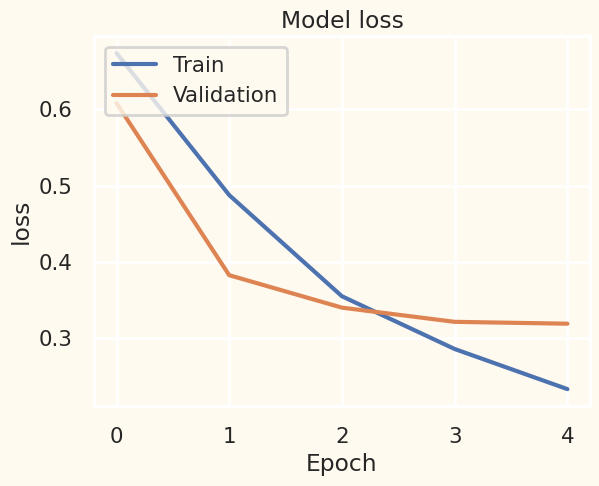

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Hypertuning GRU</div>

In [64]:
import keras

def Hyper_GRU_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_shape=(X_train.shape[1],)))
    
    units = hp.Int('units', min_value=1, max_value=10, step=2)
    model.add(keras.layers.GRU(units, return_sequences=True))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.GRU(units, return_sequences=True))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))
        
    model.add(keras.layers.GRU(units))
    model.add(keras.layers.Dropout(rate=hp.Float('final_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    print("Model built with the following architecture:")
    model.summary()
    
    return model

In [65]:
import kerastuner as kt
tuner = kt.RandomSearch(Hyper_GRU_model,objective = 'val_accuracy',
                       max_trials = 5,
                       directory = '/kaggle/working/',
                       project_name='GRU_hyperparameter')

Model built with the following architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │    14,212,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 1)         │           309 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100, 1)         │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,212,435 (54.22 MB)

 Trainable params: 14,212,435 (54.22 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
import tensorflow
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

In [67]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
tuner.search(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

Trial 5 Complete [00h 21m 47s]
val_accuracy: 0.8826258182525635

Best val_accuracy So Far: 0.8826258182525635
Total elapsed time: 02h 30m 52s


In [68]:
best_model = tuner.get_best_models(num_models=1)[0]

Model built with the following architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │    14,212,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 3)         │           945 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 3)         │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 3)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213,193 (54.22 MB)

 Trainable params: 14,213,193 (54.22 MB)

 Non-trainable params: 0 (0.00 B)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Evaluation and Comparision  </div>

## Bideirectional RNN (Recurrent Neural Network)

In [69]:
RNN_pred = RNN_model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [70]:
RNN_pred = (RNN_pred > 0.5).astype('int')

In [71]:
Bidirection_RNN_Accuracy = accuracy_score(RNN_pred,y_test)*100
print("Bidirection_RNN_Accuracy Score is :",Bidirection_RNN_Accuracy,'%')

Bidirection_RNN_Accuracy Score is : 71.48331148532823 %


In [72]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, RNN_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.684087,0.814027,0.743422,5033.000000
1,0.761711,0.612613,0.679074,4884.000000
accuracy,0.714833,0.714833,0.714833,0.714833
macro avg,0.722899,0.713320,0.711248,9917.000000
weighted avg,0.722316,0.714833,0.711732,9917.000000


In [73]:
sentiment_labels = {0: 'negative', 1: 'positive'}

RNN_sentiments = [[sentiment_labels[val[0]]] for val in RNN_pred]
RNN_sentiments[0:10]

[['negative'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

## LSTM (Long short Term Memory)

In [74]:
lstm_pred = lstm_model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [75]:
lstm_pred = (lstm_pred > 0.5).astype('int')

In [76]:
LSTM_Accuracy = accuracy_score(lstm_pred,y_test)*100
print("LSTM_Accuracy Score is :",LSTM_Accuracy,'%')

LSTM_Accuracy Score is : 85.92316224664717 %


In [77]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, lstm_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.861028,0.861713,0.861370,5033.000000
1,0.857377,0.856675,0.857026,4884.000000
accuracy,0.859232,0.859232,0.859232,0.859232
macro avg,0.859203,0.859194,0.859198,9917.000000
weighted avg,0.859230,0.859232,0.859231,9917.000000


In [78]:
sentiment_labels = {0: 'negative', 1: 'positive'}

lstm_sentiments = [[sentiment_labels[val[0]]] for val in lstm_pred]
lstm_sentiments[0:10]

[['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

##  GRU (Grated Recurrent Unit)

In [79]:
GRU_pred = GRU_model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [80]:
GRU_pred = (GRU_pred > 0.5).astype('int')

In [81]:
GRU_Accuracy = accuracy_score(GRU_pred,y_test)*100
print("GRU_Accuracy Score is :",GRU_Accuracy,'%')

GRU_Accuracy Score is : 87.67772511848341 %


In [82]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, GRU_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.885339,0.869859,0.877531,5033.000000
1,0.868262,0.883907,0.876015,4884.000000
accuracy,0.876777,0.876777,0.876777,0.876777
macro avg,0.876800,0.876883,0.876773,9917.000000
weighted avg,0.876929,0.876777,0.876784,9917.000000


In [83]:
GRU_sentiments = [[sentiment_labels[val[0]]] for val in GRU_pred]
GRU_sentiments[0:10]

[['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

## Hypertuned GRU (Grated Recurrent Unit)

In [84]:
Hypertuned_GRU_pred = best_model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [85]:
Hypertuned_GRU_pred = (Hypertuned_GRU_pred > 0.5).astype('int')

In [86]:
Hypertuned_GRU_Accuracy = accuracy_score(Hypertuned_GRU_pred,y_test)*100
print("Hypertuned_GRU_Accuracy Score is :",Hypertuned_GRU_Accuracy,'%')

Hypertuned_GRU_Accuracy Score is : 88.2625794090955 %


In [87]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, Hypertuned_GRU_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.873816,0.898470,0.885972,5033.000000
1,0.892240,0.866298,0.879077,4884.000000
accuracy,0.882626,0.882626,0.882626,0.882626
macro avg,0.883028,0.882384,0.882525,9917.000000
weighted avg,0.882890,0.882626,0.882576,9917.000000


In [88]:
HYpertuned_GRU_sentiments = [[sentiment_labels[val[0]]] for val in Hypertuned_GRU_pred]
HYpertuned_GRU_sentiments[0:10]

[['negative'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

In [89]:
comp_df = pd.DataFrame(columns = ['Bidirectional_RNN','LSTM_Sentiment','GRU_Sentiment','hypertune_gru_sentiments'])
comp_df['Bidirectional_RNN'] = RNN_sentiments
comp_df['LSTM_Sentiment'] = lstm_sentiments
comp_df['GRU_Sentiment'] = GRU_sentiments
comp_df['hypertune_gru_sentiments'] = HYpertuned_GRU_sentiments

In [90]:
comp_df.head(10)

,Bidirectional_RNN,LSTM_Sentiment,GRU_Sentiment,hypertune_gru_sentiments
0,[negative],[positive],[positive],[negative]
1,[positive],[positive],[positive],[positive]
2,[positive],[positive],[positive],[positive]
3,[positive],[positive],[positive],[positive]
4,[positive],[positive],[positive],[positive]
5,[negative],[negative],[negative],[negative]
6,[positive],[positive],[positive],[positive]
7,[positive],[positive],[positive],[positive]
8,[negative],[negative],[negative],[negative]
9,[negative],[negative],[negative],[negative]


In [91]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['Bidirectional RNN', 'LSTM', 'GRU', 'Hypertuned GRU'],
    'Accuracy': [Bidirection_RNN_Accuracy, LSTM_Accuracy, GRU_Accuracy, Hypertuned_GRU_Accuracy]
}
Acc_df = pd.DataFrame(data)


In [92]:
Acc_df

,Model,Accuracy
0,Bidirectional RNN,71.483311
1,LSTM,85.923162
2,GRU,87.677725
3,Hypertuned GRU,88.262579


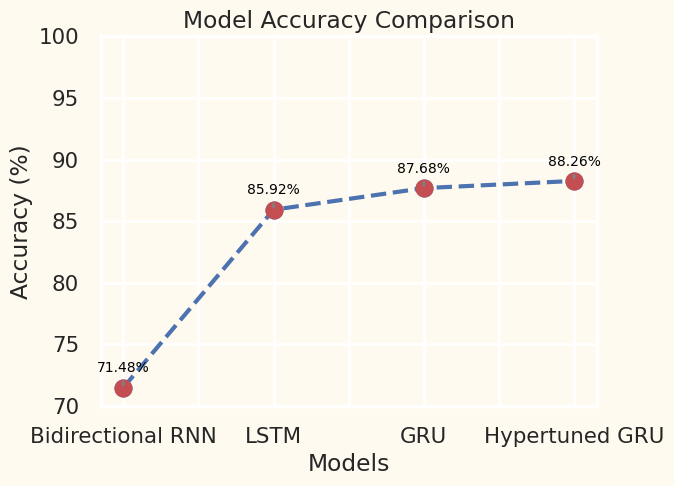

In [93]:
# Plot the DataFrame
ax = Acc_df.plot(x='Model', y='Accuracy', marker='o', linestyle='dashed', color='b', legend=False)

# Add labels, title, and customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)  # Set the y-axis limits for percentage values

# Highlight the points and add value labels
for i, accuracy in enumerate(Acc_df['Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))
    ax.plot(i, accuracy, 'ro')  # Highlight points with red color

# Show the plot
plt.show()
